# Naive Bayes

## Prepare a classification model using Naive Bayes for salary data 


In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB

In [2]:
data = pd.read_csv('C:\\Users\\User\\Documents\\Datascience_Assignments\\Assignment 12 (Naive Bayes)\\SalaryData_Train.csv')
data.head(10)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


## Performing the basic EDA

### Converting the data into numerical data types using the label encoder

In [3]:
label = preprocessing.LabelEncoder()
data['Salary'] = label.fit_transform(data.Salary)
data['workclass'] = label.fit_transform(data.workclass)
data['education'] = label.fit_transform(data.education)
data['maritalstatus'] = label.fit_transform(data.maritalstatus)
data['occupation'] = label.fit_transform(data.occupation)
data['relationship'] = label.fit_transform(data.relationship)
data['race'] = label.fit_transform(data.race )
data['sex'] = label.fit_transform(data.sex)
data['native'] = label.fit_transform(data.native)
data.head(10)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
5,37,2,12,14,2,3,5,4,0,0,0,40,37,0
6,49,2,6,5,3,7,1,2,0,0,0,16,21,0
7,52,4,11,9,2,3,0,4,1,0,0,45,37,1
8,31,2,12,14,4,9,1,4,0,14084,0,50,37,1
9,42,2,9,13,2,3,0,4,1,5178,0,40,37,1


In [4]:
data = data.drop(['educationno'],axis = 1)

In [5]:
data.nunique() 

age               72
workclass          7
education         16
maritalstatus      7
occupation        14
relationship       6
race               5
sex                2
capitalgain      118
capitalloss       90
hoursperweek      94
native            40
Salary             2
dtype: int64

In [6]:
data.isna().sum()

age              0
workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            30161 non-null  int64
 1   workclass      30161 non-null  int32
 2   education      30161 non-null  int32
 3   maritalstatus  30161 non-null  int32
 4   occupation     30161 non-null  int32
 5   relationship   30161 non-null  int32
 6   race           30161 non-null  int32
 7   sex            30161 non-null  int32
 8   capitalgain    30161 non-null  int64
 9   capitalloss    30161 non-null  int64
 10  hoursperweek   30161 non-null  int64
 11  native         30161 non-null  int32
 12  Salary         30161 non-null  int32
dtypes: int32(9), int64(4)
memory usage: 2.0 MB


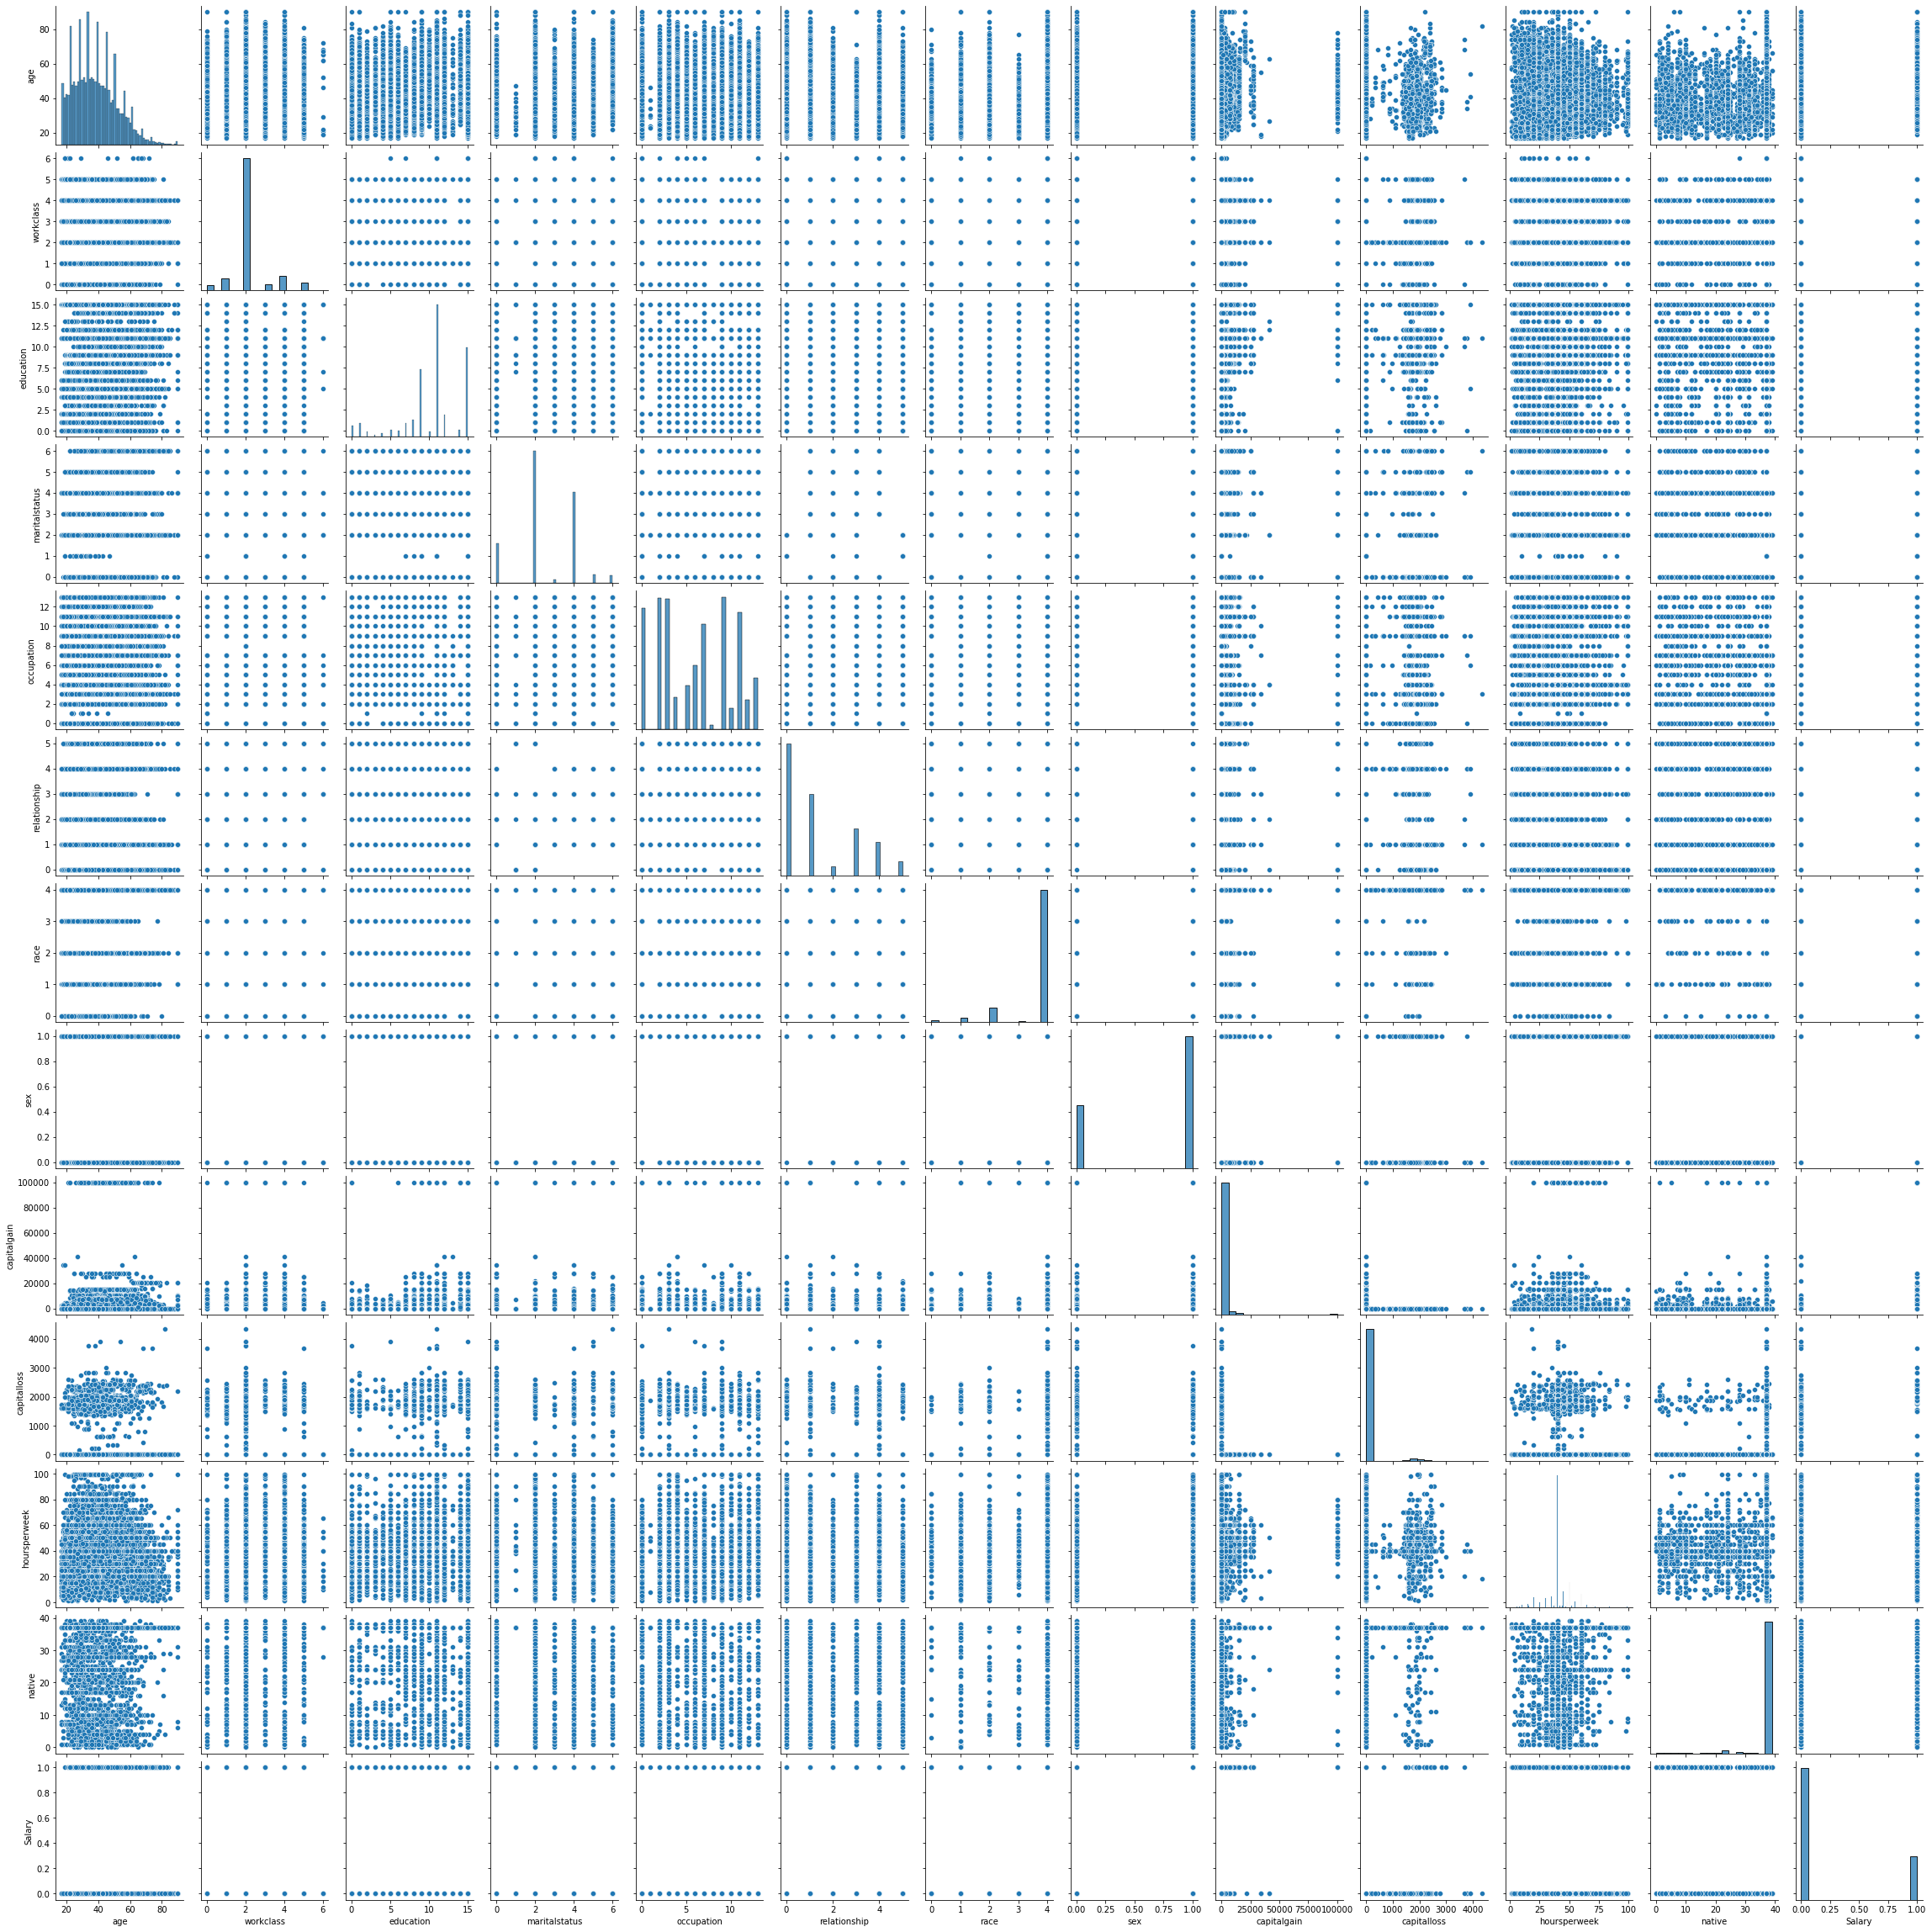

In [8]:
sns.pairplot(data)

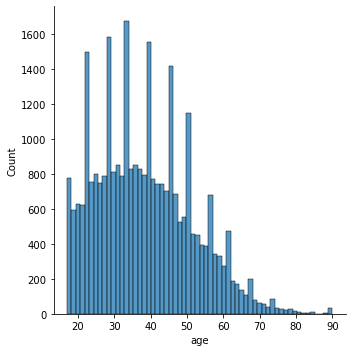

In [9]:
sns.displot(data.age)

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hoursperweek', ylabel='Density'>

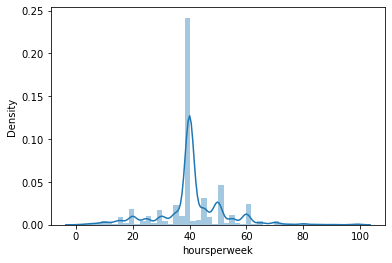

In [10]:
sns.distplot(data.hoursperweek)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='workclass', ylabel='count'>

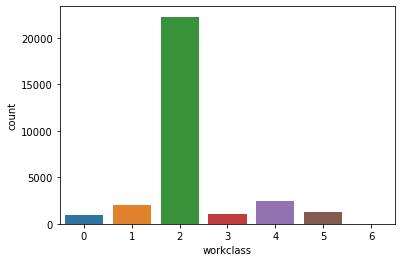

In [11]:
sns.countplot(data.workclass)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education', ylabel='count'>

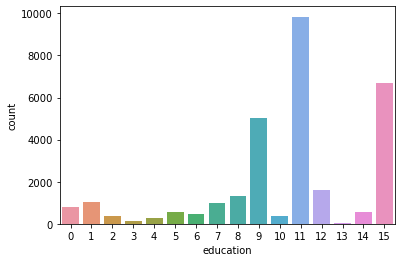

In [12]:
sns.countplot(data.education)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='maritalstatus', ylabel='count'>

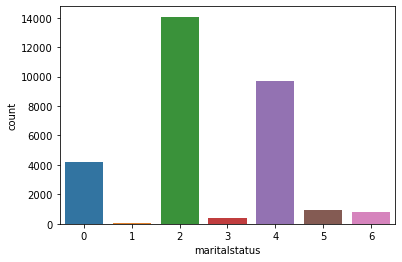

In [13]:
sns.countplot(data.maritalstatus)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='occupation', ylabel='count'>

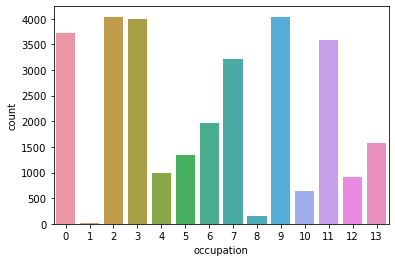

In [14]:
sns.countplot(data.occupation)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='race', ylabel='count'>

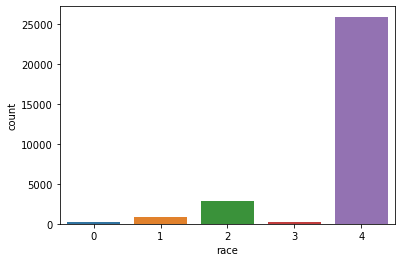

In [15]:
sns.countplot(data.race)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

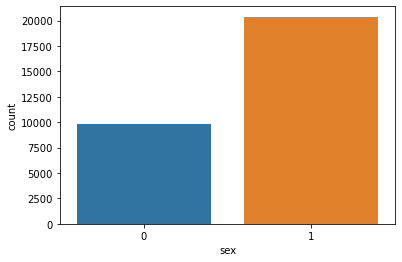

In [16]:
sns.countplot(data.sex)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='relationship', ylabel='count'>

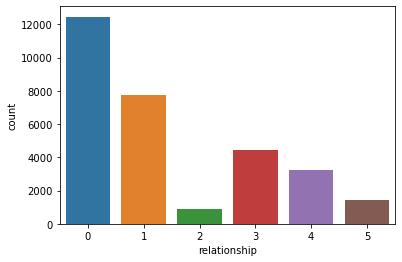

In [17]:
sns.countplot(data.relationship)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary', ylabel='count'>

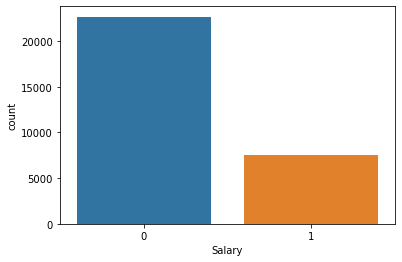

In [18]:
sns.countplot(data.Salary)

## Checking for the Outliers using boxplot

{'whiskers': [<matplotlib.lines.Line2D at 0x22875d877c0>,
 'caps': [<matplotlib.lines.Line2D at 0x22875d87e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x22875d874c0>],
 'medians': [<matplotlib.lines.Line2D at 0x22875d94580>],
 'fliers': [<matplotlib.lines.Line2D at 0x22875d948e0>],
 'means': []}

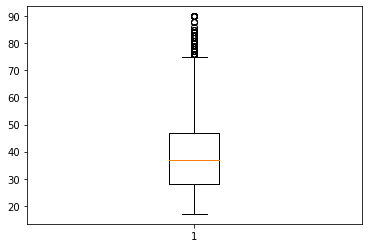

In [19]:
plt.boxplot(data.age)

{'whiskers': [<matplotlib.lines.Line2D at 0x22875de4a00>,
 'caps': [<matplotlib.lines.Line2D at 0x22875df1100>,
 'boxes': [<matplotlib.lines.Line2D at 0x22875de46a0>],
 'medians': [<matplotlib.lines.Line2D at 0x22875df17c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22875df1b20>],
 'means': []}

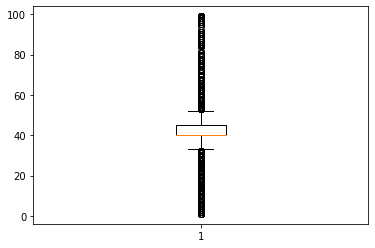

In [20]:
plt.boxplot(data.hoursperweek)

In [21]:
x = data.iloc[:,0:-1]
x 

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,4,0,1,4,1,2174,0,40,37
1,50,4,9,2,3,0,4,1,0,0,13,37
2,38,2,11,0,5,1,4,1,0,0,40,37
3,53,2,1,2,5,0,2,1,0,0,40,37
4,28,2,9,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,2,12,5,4,0,0,0,38,37
30157,40,2,11,2,6,0,4,1,0,0,40,37
30158,58,2,11,6,0,4,4,0,0,0,40,37
30159,22,2,11,4,0,3,4,1,0,0,20,37


In [22]:
y = data.iloc[:,-1]
y 

0        0
1        0
2        0
3        0
4        0
        ..
30156    0
30157    1
30158    0
30159    0
30160    1
Name: Salary, Length: 30161, dtype: int32

## Building the model of the Naive Bayes

In [23]:
model = MultinomialNB()

In [24]:
model.fit(x,y)

MultinomialNB()

### Testing the model on the test dataset

In [25]:
data_test = pd.read_csv('C:\\Users\\User\\Documents\\Datascience_Assignments\\Assignment 12 (Naive Bayes)\\SalaryData_Test.csv')
data_test.head(10)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
5,63,Self-emp-not-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
6,24,Private,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
7,55,Private,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K
8,65,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K
9,36,Federal-gov,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K


In [26]:
label = preprocessing.LabelEncoder()
data_test['Salary'] = label.fit_transform(data_test.Salary)
data_test['workclass'] = label.fit_transform(data_test.workclass)
data_test['education'] = label.fit_transform(data_test.education)
data_test['maritalstatus'] = label.fit_transform(data_test.maritalstatus)
data_test['occupation'] = label.fit_transform(data_test.occupation)
data_test['relationship'] = label.fit_transform(data_test.relationship)
data_test['race'] = label.fit_transform(data_test.race )
data_test['sex'] = label.fit_transform(data_test.sex)
data_test['native'] = label.fit_transform(data_test.native)
data_test = data_test.drop(['educationno'],axis = 1)
data_test.head(10)

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,4,6,3,2,1,0,0,40,37,0
1,38,2,11,2,4,0,4,1,0,0,50,37,0
2,28,1,7,2,10,0,4,1,0,0,40,37,1
3,44,2,15,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,4,7,1,4,1,0,0,30,37,0
5,63,4,14,2,9,0,4,1,3103,0,32,37,1
6,24,2,15,4,7,4,4,0,0,0,40,37,0
7,55,2,5,2,2,0,4,1,0,0,10,37,0
8,65,2,11,2,6,0,4,1,6418,0,40,37,1
9,36,0,9,2,0,0,4,1,0,0,40,37,0


In [27]:
x_test = data_test.iloc[:,0:-1]
x_test

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,2,1,4,6,3,2,1,0,0,40,37
1,38,2,11,2,4,0,4,1,0,0,50,37
2,28,1,7,2,10,0,4,1,0,0,40,37
3,44,2,15,2,6,0,2,1,7688,0,40,37
4,34,2,0,4,7,1,4,1,0,0,30,37
...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,4,9,3,4,1,0,0,40,37
15056,39,2,9,0,9,1,4,0,0,0,36,37
15057,38,2,9,2,9,0,4,1,0,0,50,37
15058,44,2,9,0,0,3,1,1,5455,0,40,37


In [28]:
y_test = data_test.iloc[:,-1]
y

0        0
1        0
2        0
3        0
4        0
        ..
30156    0
30157    1
30158    0
30159    0
30160    1
Name: Salary, Length: 30161, dtype: int32

In [29]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87     11360
           1       0.62      0.21      0.32      3700

    accuracy                           0.77     15060
   macro avg       0.71      0.58      0.59     15060
weighted avg       0.75      0.77      0.73     15060

